In [1]:
# 导入相关库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# 读取xlsx文件
data = pd.read_excel('data.xlsx')
# 提取标签值yt和特征值x1到x9
yt = data['yt'].values
X = data[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9']].values

D:\Env\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 30456 (\N{CJK UNIFIED IDEOGRAPH-76F8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Env\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20851 (\N{CJK UNIFIED IDEOGRAPH-5173}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Env\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Env\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Env\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


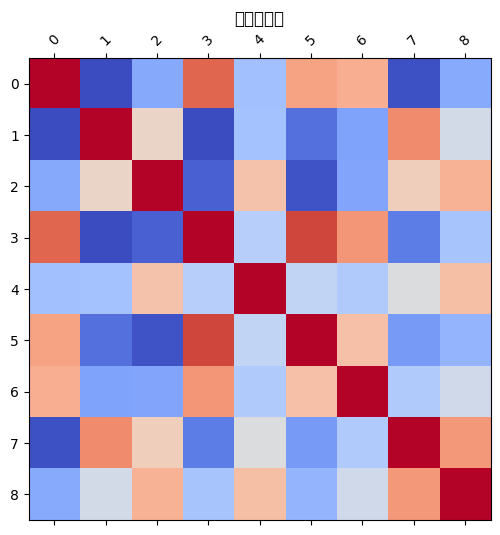

In [3]:
# 相关系数图
correlation_matrix = np.corrcoef(X, rowvar=False)
fig, ax = plt.subplots(figsize=(6, 6))
X = pd.DataFrame(X)
ax.matshow(correlation_matrix, cmap='coolwarm')
plt.xticks(range(len(X.columns)), X.columns, rotation=45)
plt.yticks(range(len(X.columns)), X.columns)
plt.title('相关系数图')

plt.show()

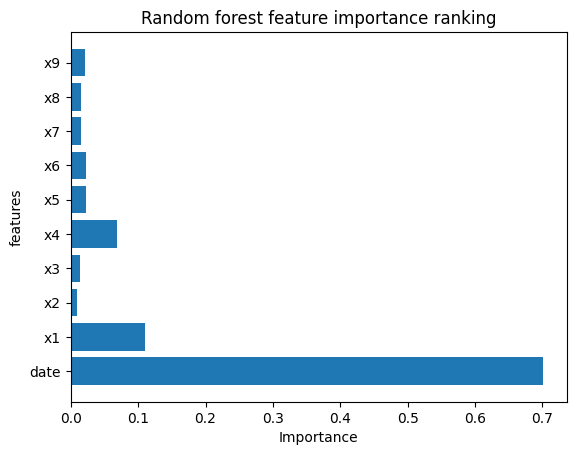

In [4]:
# 随机森林特征重要性排序
from sklearn.ensemble import RandomForestRegressor

# 将数据集分为训练集和测试集，比例为7:3
train_size = int(0.7 * len(data))
train_data = data[:train_size]
test_data = data[train_size:]

# 训练随机森林模型
rf = RandomForestRegressor(n_estimators=500, random_state=42)
rf.fit(train_data.drop('yt', axis=1), train_data['yt'])

# 查看变量的重要性
importance = rf.feature_importances_
feature_names = train_data.drop('yt', axis=1).columns

plt.barh(range(len(importance)), importance, align='center')
plt.yticks(range(len(importance)), feature_names)
plt.xlabel('Importance')
plt.ylabel('features')
plt.title('Random forest feature importance ranking')
plt.show()

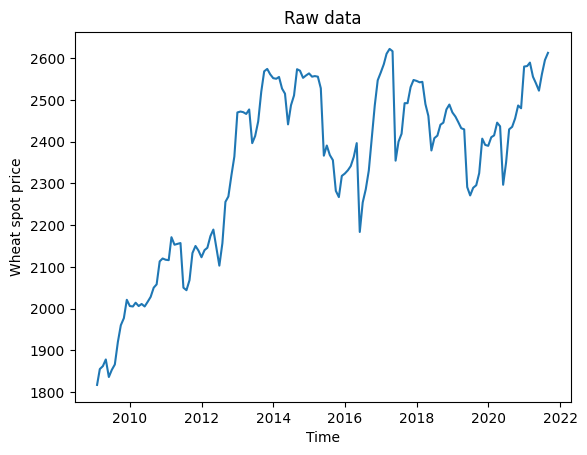

In [5]:
# ARIMA模型
from statsmodels.tsa.arima.model import ARIMA

# 创建时间序列
dates = pd.date_range(start='2009-01', end='2021-9', freq='M')
y = pd.Series(yt[1:], index=dates)

# 绘制原始数据图
plt.plot(y)
plt.xlabel('Time')
plt.ylabel('Wheat spot price')
plt.title('Raw data')
plt.show()

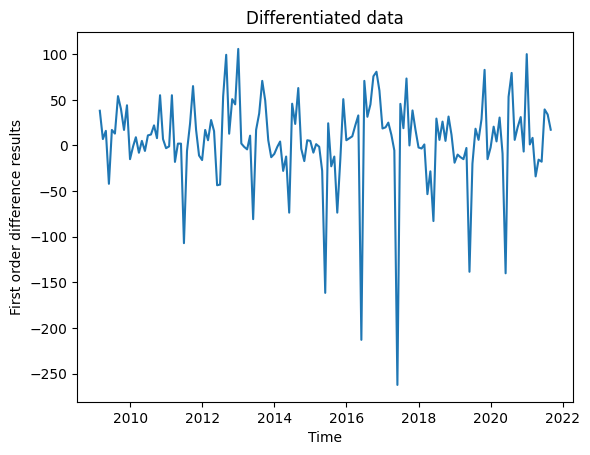

D:\Env\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Env\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [6]:
# 差分运算
diff_y = y.diff().dropna()

# 绘制差分后的数据图
plt.plot(diff_y)
plt.xlabel('Time')
plt.ylabel('First order difference results')
plt.title('Differentiated data')
plt.show()

# 拟合ARIMA模型
model = ARIMA(y, order=(2, 1, 1))
result = model.fit()

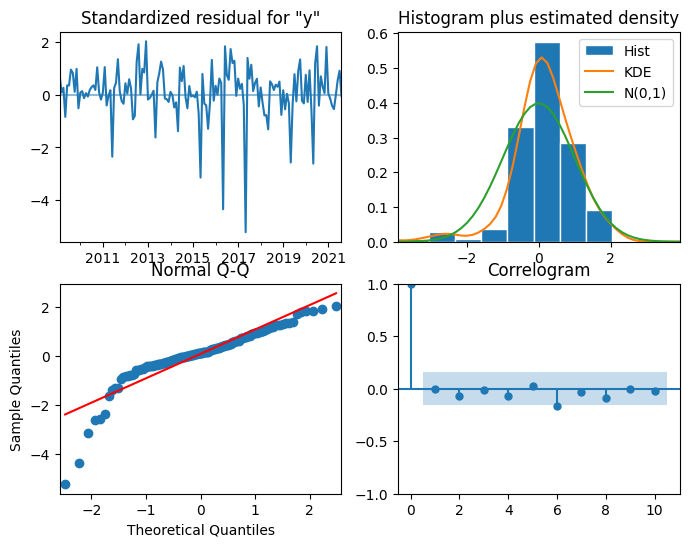

In [7]:
# 绘制模型诊断图
result.plot_diagnostics(figsize=(8, 6))
plt.show()

                lower y      upper y
2021-09-30  2506.597382  2694.812168
2021-10-31  2471.945153  2754.996525
2021-11-30  2422.200760  2779.471806
2021-12-31  2404.809790  2822.100823
2022-01-31  2365.330565  2836.405595


Text(0, 0.5, 'Wheat spot price')

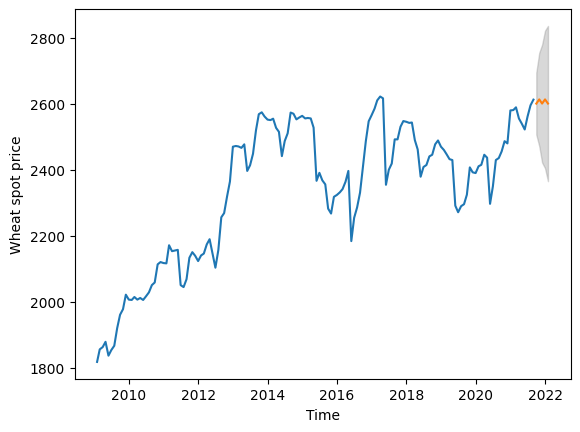

In [8]:
# 预测
forecast = result.get_forecast(steps=5)
pred = forecast.predicted_mean
ci = forecast.conf_int()

print(ci)

# 绘制预测结果图
plt.plot(y.index, y, label='real')
plt.plot(pred.index, pred, label='pred')
plt.fill_between(ci.index, ci['lower y'], ci['upper y'], color='gray', alpha=0.3, label='置信区间')
plt.xlabel('Time')
plt.ylabel('Wheat spot price')


In [9]:
import torch
import torch.nn as nn
save_path = './models/arima_model.pth'
torch.save(model, save_path)
print("保存模型！！")

保存模型！！
